# **Text Preprocessing**

In [72]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import nltk
import re

In [73]:
# Specify the filename
input_file = "E:\Assingment\Python Project\Autocomplete sentence\holmes.txt"

# Read the contents of the file
with open(input_file, 'r', encoding='utf-8') as infile:
    data = infile.read()

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ayush\AppData\Local\Temp\ipykernel_16844\1008311366.py:2: SyntaxWarning: invalid escape sequence '\A'
  input_file = "E:\Assingment\Python Project\Autocomplete sentence\holmes.txt"


In [74]:
# view first few characters
data[:100]

"*Project Gutenberg's Etext of Tom Swift And His Submarine Boat*\n\n#4 in the Victor Appleton's Tom Swi"

In [75]:
# Limit data to 500000 characters
data = data[:500000]

# Clean Text

In [76]:
# Function to remove emojis and special characters from text
def remove_emojis_and_special_characters(text):
    
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    
    return text

In [77]:
# Preprocessing pipeline
def preprocess_pipeline(data) -> 'list':

    # Split by newline character
    sentences = data.split('\n')
    for i in range(len(sentences)):
        sentences[i] = remove_emojis_and_special_characters(sentences[i])

    # Remove leading and trailing spaces
    sentences = [s.strip() for s in sentences]

    # Drop empty sentences
    sentences = [s for s in sentences if len(s) > 0]

    # Tokenization
    tokenized = []
    for sentence in sentences:
        # Convert to lowercase
        sentence = sentence.lower()
        tokenized.append(sentence)
    return tokenized

# Tokenize sentences
tokenized_sentences = preprocess_pipeline(data)

In [78]:
# Tokenize words
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(tokenized_sentences)
total_words = len(tokenizer.word_index) + 1

In [79]:
tokenizer.word_counts

OrderedDict([('project', 59),
             ('gutenbergs', 5),
             ('etext', 62),
             ('of', 2042),
             ('tom', 1065),
             ('swift', 310),
             ('and', 2430),
             ('his', 907),
             ('submarine', 237),
             ('boat', 73),
             ('4', 2),
             ('in', 1183),
             ('the', 6241),
             ('victor', 7),
             ('appletons', 2),
             ('series', 14),
             ('we', 484),
             ('name', 25),
             ('these', 39),
             ('files', 14),
             ('as', 731),
             ('they', 573),
             ('are', 208),
             ('numbered', 3),
             ('books', 9),
             ('ie', 2),
             ('this', 342),
             ('is', 348),
             ('so', 249),
             ('file', 12),
             ('04tomxxxxxx', 1),
             ('where', 135),
             ('xs', 2),
             ('place', 72),
             ('holders', 2),
             ('for', 796

In [80]:
tokenizer.word_index

{'<oov>': 1,
 'the': 2,
 'to': 3,
 'and': 4,
 'of': 5,
 'a': 6,
 'was': 7,
 'he': 8,
 'it': 9,
 'in': 10,
 'i': 11,
 'tom': 12,
 'you': 13,
 'that': 14,
 'his': 15,
 'mr': 16,
 'for': 17,
 'on': 18,
 'as': 19,
 'but': 20,
 'had': 21,
 'they': 22,
 'with': 23,
 'be': 24,
 'we': 25,
 'were': 26,
 'at': 27,
 'not': 28,
 'have': 29,
 'there': 30,
 'from': 31,
 'is': 32,
 'this': 33,
 'one': 34,
 'if': 35,
 'all': 36,
 'swift': 37,
 'by': 38,
 'him': 39,
 'out': 40,
 'well': 41,
 'no': 42,
 'up': 43,
 'some': 44,
 'what': 45,
 'an': 46,
 'my': 47,
 'or': 48,
 'do': 49,
 'get': 50,
 'so': 51,
 'will': 52,
 'them': 53,
 'could': 54,
 'submarine': 55,
 'car': 56,
 'then': 57,
 'would': 58,
 'damon': 59,
 'more': 60,
 'when': 61,
 'captain': 62,
 'did': 63,
 'sharp': 64,
 'about': 65,
 'now': 66,
 'are': 67,
 'me': 68,
 'which': 69,
 'dont': 70,
 'been': 71,
 'inventor': 72,
 'see': 73,
 'go': 74,
 'going': 75,
 'over': 76,
 'can': 77,
 'lad': 78,
 'cried': 79,
 'ill': 80,
 'asked': 81,
 'after

In [81]:
total_words

6120

In [82]:
# Generate input sequences
input_sequences = []
for line in tokenized_sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [83]:
# Creates labels with input sequences
X,labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [84]:
# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train_temp, X_val_test, y_train_temp, y_val_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Train Model

In [85]:
# Define your model
model = Sequential()
model.add(Embedding(total_words, 100)) 
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
history = model.fit(X_train_temp, y_train_temp, epochs=5, validation_data=(X_val, y_val), verbose=1)

Epoch 1/5
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.0951 - loss: 6.3922 - val_accuracy: 0.1234 - val_loss: 6.4928
Epoch 2/5
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.1285 - loss: 5.9784 - val_accuracy: 0.1143 - val_loss: 6.8039
Epoch 3/5
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.1365 - loss: 5.8351 - val_accuracy: 0.1268 - val_loss: 6.7124
Epoch 4/5
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.1558 - loss: 5.1823 - val_accuracy: 0.1255 - val_loss: 6.9744
Epoch 5/5
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.1699 - loss: 4.9281 - val_accuracy: 0.1258 - val_loss: 7.1980


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


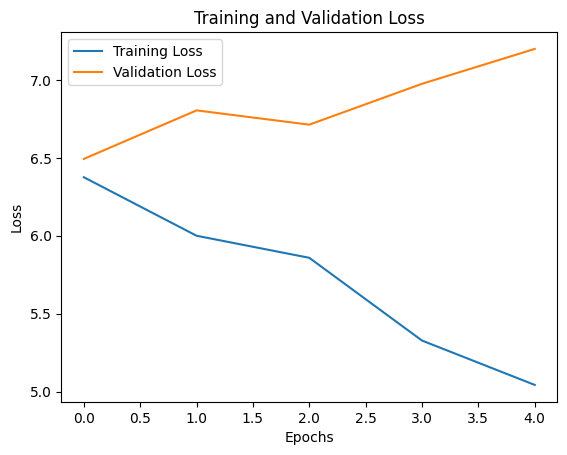

In [97]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


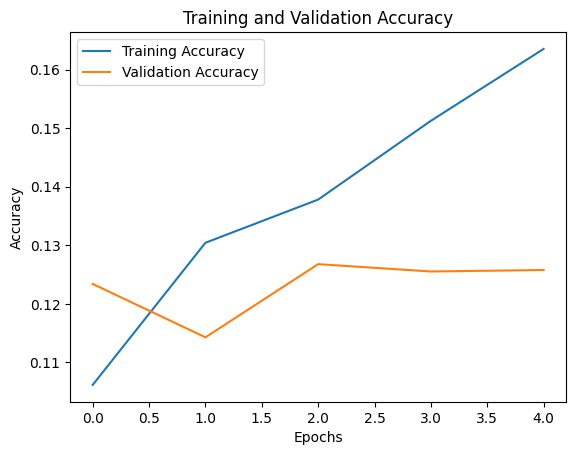

In [92]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Inferences

In [98]:
def predict_top_five_words(seed_text, model, tokenizer):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    top_five_indexes = np.argsort(predicted[0])[::-1][:5]
    top_five_words = []
    for index in top_five_indexes:
        for word, idx in tokenizer.word_index.items():
            if idx == index:
                top_five_words.append(word)
                break
    return top_five_words


In [105]:
# Test the function
seed_text = str(input("Enter your sentence: "))
predict_top_five_words(seed_text, model, tokenizer)

['flurry', 'shell', 'pushed', 'editions', 'reaching']

In [106]:
for i in predict_top_five_words(seed_text, model, tokenizer):
    print(seed_text,i)

I love flurry
I love shell
I love pushed
I love editions
I love reaching
